## Data Scraping part


Data scraped from money control 

In [1]:

from bs4 import BeautifulSoup
import requests

## Top10gainers

In [2]:
def top10gainers():
    data = requests.get(
        'https://www.moneycontrol.com/stocks/marketstats/bsegainer/index.php').text

    soup = BeautifulSoup(data, 'html.parser')
    allCompanies = soup.find_all('span', class_='gld13 disin')
    companyNames = []
    for i in allCompanies:
        a=i.find('a')
        if len(companyNames)<10:
            companyNames.append(a.text)
        
    return companyNames


In [3]:
gainers=top10gainers()

In [4]:
gainers

['UltraTechCement',
 'HDFC',
 'HDFC Bank',
 'Axis Bank',
 'ICICI Bank',
 'Titan Company',
 'Kotak Mahindra',
 'HUL',
 'Nestle',
 'Sun Pharma']

## top10losers

In [5]:
def top10losers():
    data = requests.get(
        'https://www.moneycontrol.com/stocks/marketstats/bseloser/index.php').text

    soup = BeautifulSoup(data, 'html.parser')
    allCompanies = soup.find_all('span', class_='gld13 disin')
    companyNames = []
    for i in allCompanies:
        a=i.find('a')
        if len(companyNames)<10:
            companyNames.append(a.text)
        
    return companyNames


In [6]:
losers=top10losers()

In [7]:
losers

['Infosys',
 'NTPC',
 'Power Grid Corp',
 'Wipro',
 'IndusInd Bank',
 'HCL Tech',
 'Tech Mahindra',
 'TCS',
 'Bajaj Finance',
 'Bajaj Finserv']

## Twitter Sentimental Analysis using text blob

In [8]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

In [9]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

class Twitter(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'xxxxxx'
        consumer_secret = 'xxxxxxx'
        access_token = 'xxxxxx'
        access_token_secret = 'xxxxxx'

        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")

    def preprocessing(self,tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
        
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.preprocessing(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

    def get_tweets(self, query, count =500):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []

    
        # call twitter api to fetch tweets
        fetched_tweets = self.api.search_tweets(q = query, count = count)

        # parsing tweets one by one
        for tweet in fetched_tweets:
            
                # empty dictionary to store required params of a tweet
            parsed_tweet = {}
                # saving text of tweet
            parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
            parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

                # appending parsed tweet to tweets list
            if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)

            # return parsed tweets
        return tweets

       







In [10]:
def sentimentalanalysis(stock):
    # creating object of TwitterClient Class
    api = Twitter()
    #creating a search item
    query="#"+''.join(stock.split())
    print(query)
    # calling function to get tweets
    tweets = api.get_tweets(query = query, count = 200)
    if len(tweets)>5:
        # picking positive tweets from tweets
        ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
        # percentage of positive tweets
        ptp=100*len(ptweets)/len(tweets)
        # picking negative tweets from tweets
        ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
        ntp=100*len(ntweets)/len(tweets)
        # percentage of neutral tweets
        netp=100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)
        return ptp,ntp,netp
    else:
        print(f"Not enough tweets captured for {stock}")
        return 0,0,0
    

## Twitter sentiment analysis of top gainers 

In [11]:
ptp_g={}
ntp_g={}
netp_g={}
for stock in gainers:
    ptp_g[stock],ntp_g[stock],netp_g[stock]=sentimentalanalysis(stock)

#UltraTechCement
#HDFC
#HDFCBank
#AxisBank
#ICICIBank
#TitanCompany
#KotakMahindra
#HUL
#Nestle
#SunPharma


In [12]:
ptp_l={}
ntp_l={}
netp_l={}
for stock in losers:
    ptp_l[stock],ntp_l[stock],netp_l[stock]=sentimentalanalysis(stock)

#Infosys
#NTPC
#PowerGridCorp
Not enough tweets captured for Power Grid Corp
#Wipro
#IndusIndBank
#HCLTech
#TechMahindra
#TCS
#BajajFinance
#BajajFinserv


## Analysis of positive tweets in top 10 gainers

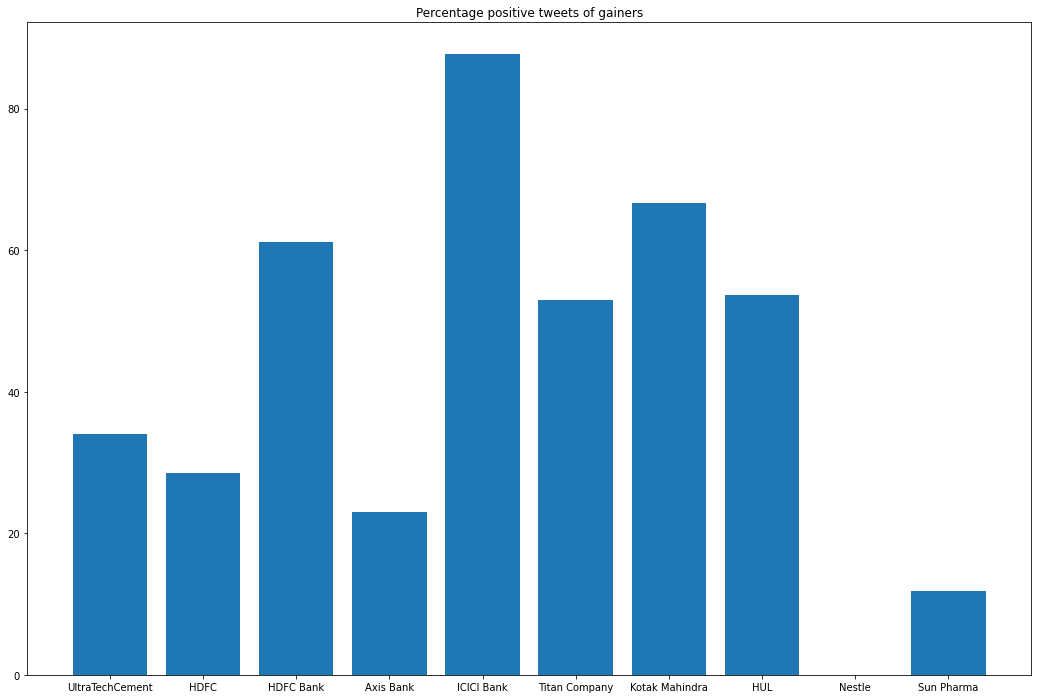

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12),facecolor='white') 
plt.title("Percentage positive tweets of gainers")


names = list(ptp_g.keys())
values = list(ptp_g.values())

plt.bar(range(len(ptp_g)), values, tick_label=names)
plt.show()

## Analysis of negative tweets in top gainers


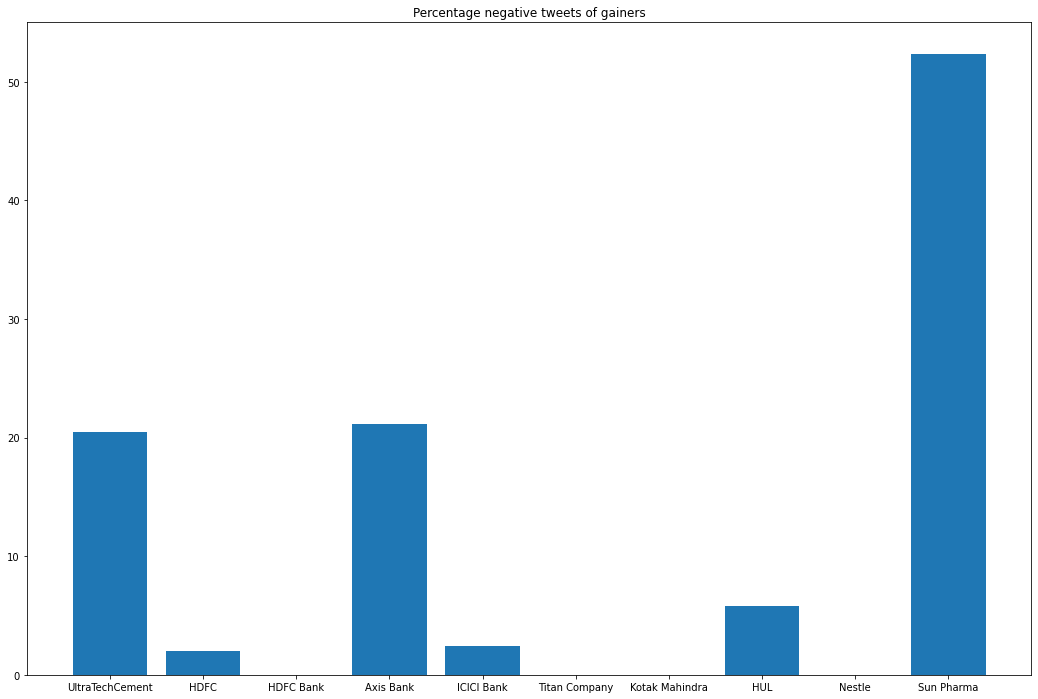

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12),facecolor="white") 
plt.title("Percentage negative tweets of gainers")


names = list(ntp_g.keys())
values = list(ntp_g.values())

plt.bar(range(len(ntp_g)), values, tick_label=names)
plt.show()

In [15]:
##Analysis of positive tweets in losers

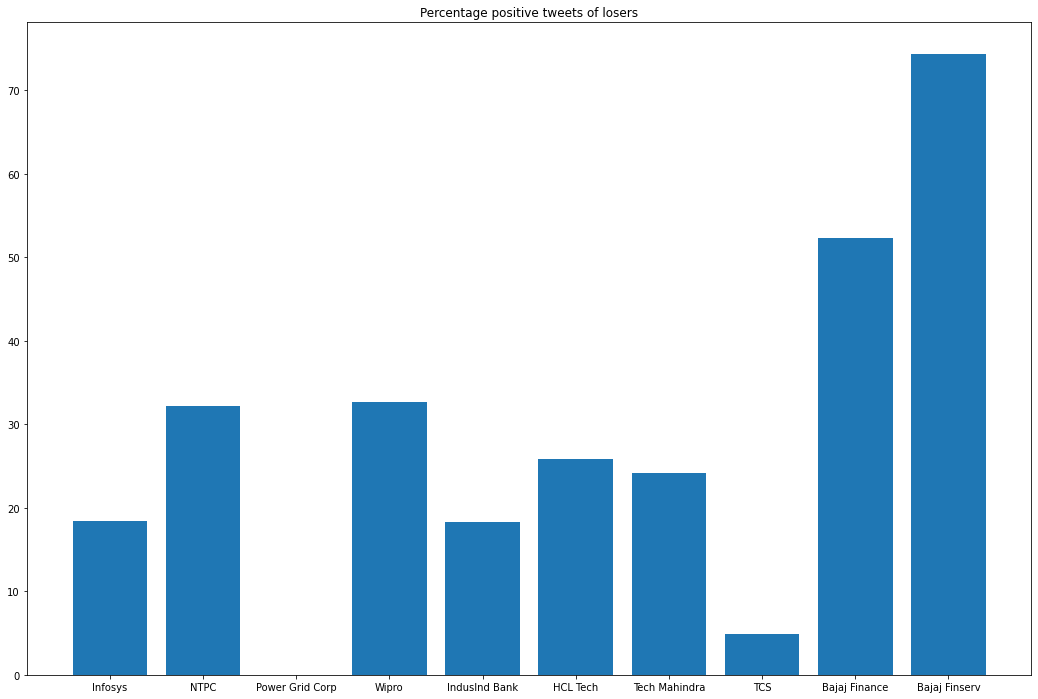

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12),facecolor="white") 
plt.title("Percentage positive tweets of losers")


names = list(ptp_l.keys())
values = list(ptp_l.values())

plt.bar(range(len(ptp_l)), values, tick_label=names)
plt.show()

## Analysis of negative tweets in losers

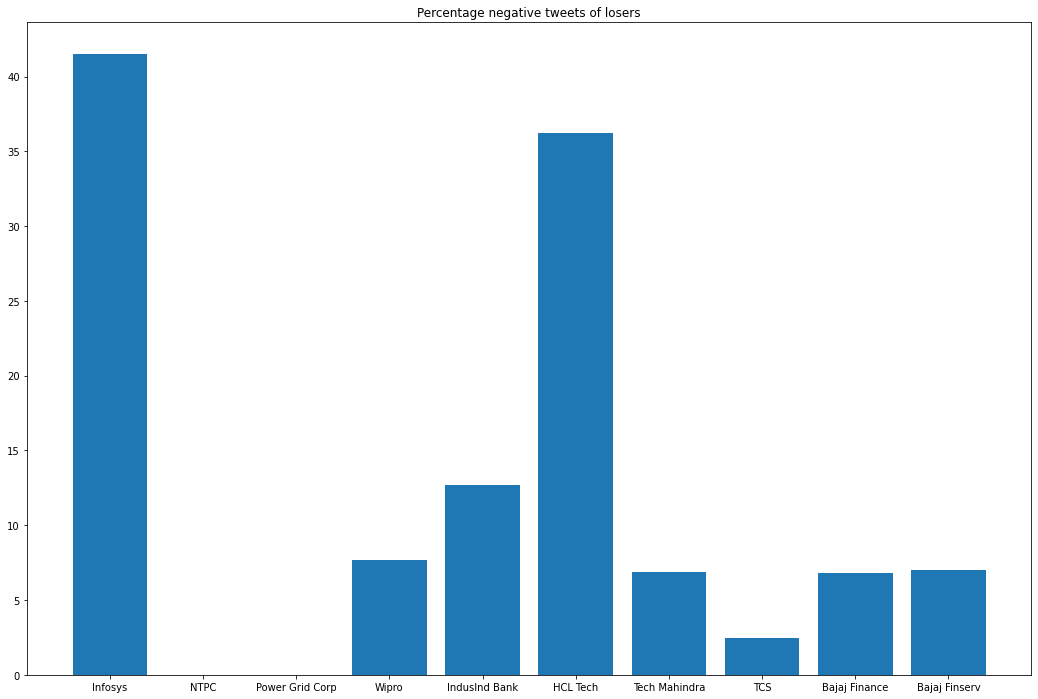

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12),facecolor="white") 
plt.title("Percentage negative tweets of losers")


names = list(ntp_l.keys())
values = list(ntp_l.values())

plt.bar(range(len(ntp_l)), values, tick_label=names)
plt.show()

## Comparison of gainers and losers in terms of negative tweets

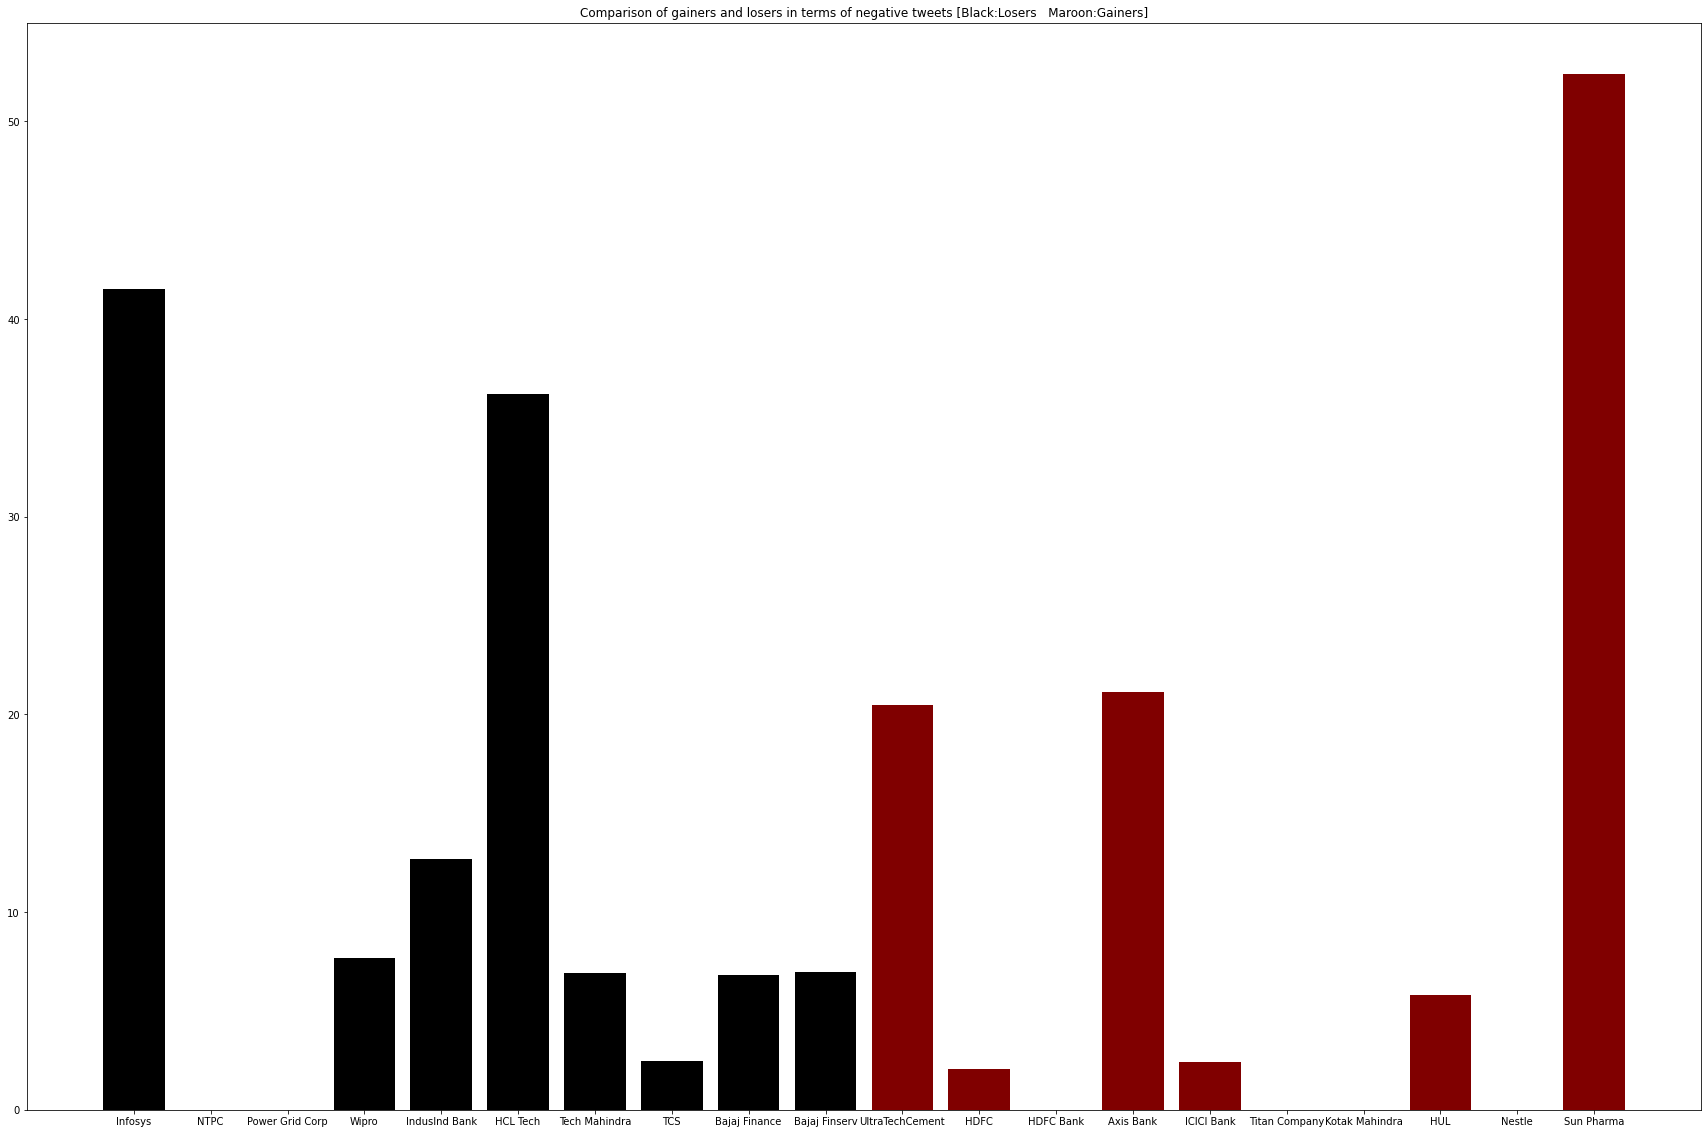

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20),facecolor="white") 
plt.title("Comparison of gainers and losers in terms of negative tweets [Black:Losers   Maroon:Gainers]")


names_l = list(ntp_l.keys())
values_l = list(ntp_l.values())
names_g = list(ntp_g.keys())
values_g = list(ntp_g.values())
color=[]
for i in range(10):
    color.append('black')
for i in range(10):
    color.append('maroon')

plt.bar(range(len(ntp_l)+len(ntp_g)), values_l+values_g,tick_label=names_l+names_g,color=color)

plt.show()

In [19]:
## Comparison of Gainers and Losers in terms of positive tweets

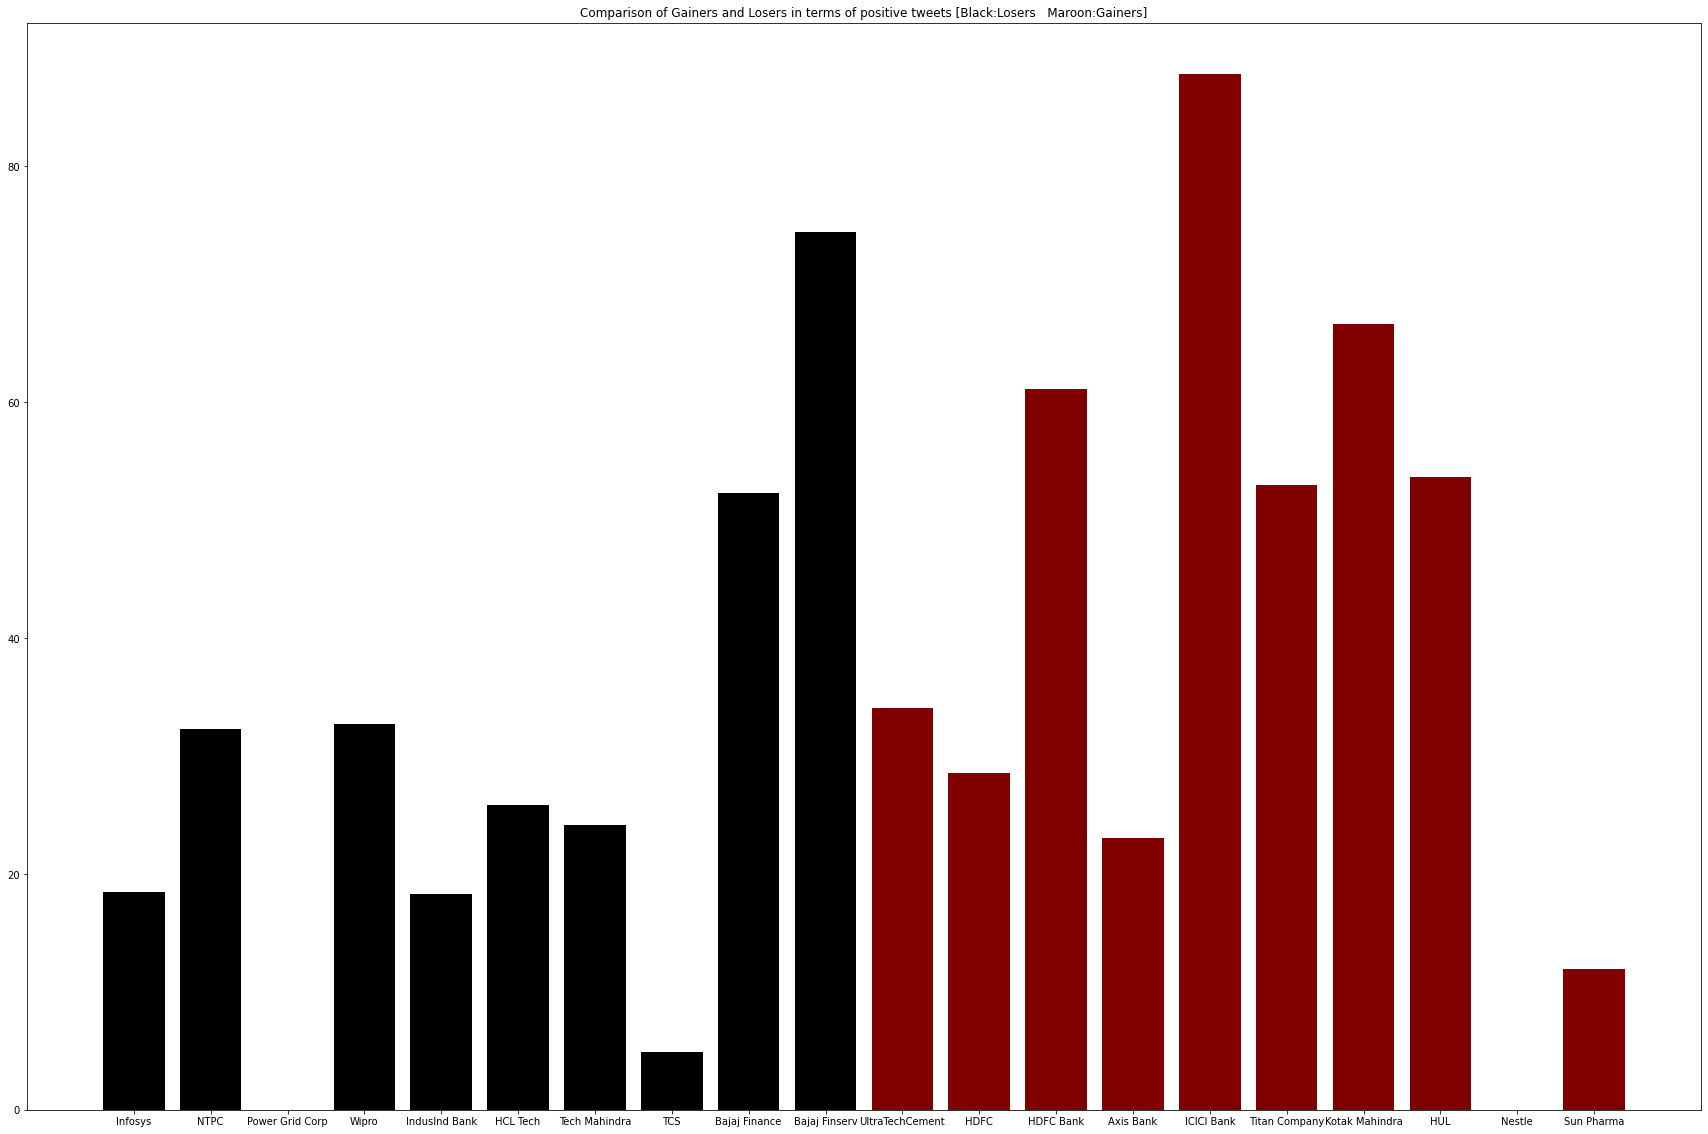

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20),facecolor="white") 
plt.title("Comparison of Gainers and Losers in terms of positive tweets [Black:Losers   Maroon:Gainers]")


names_l = list(ptp_l.keys())
values_l = list(ptp_l.values())
names_g = list(ptp_g.keys())
values_g = list(ptp_g.values())
color=[]
for i in range(10):
    color.append('black')
for i in range(10):
    color.append('maroon')

plt.bar(range(len(ptp_l)+len(ptp_g)), values_l+values_g,tick_label=names_l+names_g,color=color)

plt.show()